## MNIST Solution using SVM

For this notebook, the goal was to find out what is the number represented by an 28x28 pixel image.

The method used was SVM.

To tune the hyperparameters, it was used both grid search and random search independently. They results were then compared.

This approach obtained a 95.6% accuracy using a sample of 5000 images chosen at random.

In [57]:
%matplotlib inline

# Imports
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from random import choices
from sklearn import model_selection
from sklearn import metrics
import numpy as np
from time import time
import scipy

from sklearn import datasets, svm, metrics
from sklearn.datasets import fetch_mldata

In [58]:
# custom functions
def show_random_digits(images, targets, sample_size=12, title_text='Digit {}' ):
    nsamples=sample_size
    rand_idx = np.random.choice(images.shape[0],nsamples)
    images_and_labels = list(zip(images[rand_idx], targets[rand_idx]))


    img = plt.figure(1, figsize=(15, 12), dpi=160)
    for index, (image, label) in enumerate(images_and_labels):
        label = int(label)
        plt.subplot(np.ceil(nsamples/6.0), 6, index + 1)
        plt.axis('off')
        #each image is flat, we have to reshape to 2D array 28x28-784
        plt.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(title_text.format(label))

def plot_confusion_matrix(confusion_matrix, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(1, figsize=(15, 15), dpi=120)
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    

In [59]:
# Load data
mnist = fetch_mldata('MNIST original', data_home='./')
mnist.keys()

dict_keys(['DESCR', 'COL_NAMES', 'target', 'data'])

In [60]:
images = mnist.data
targets = mnist.target

# sample
items = range(len(images))
new_items = choices(items, k = 5000)
images = images[new_items]
targets = targets[new_items]

In [61]:
images.shape

(5000, 784)

In [62]:
targets.shape

(5000,)

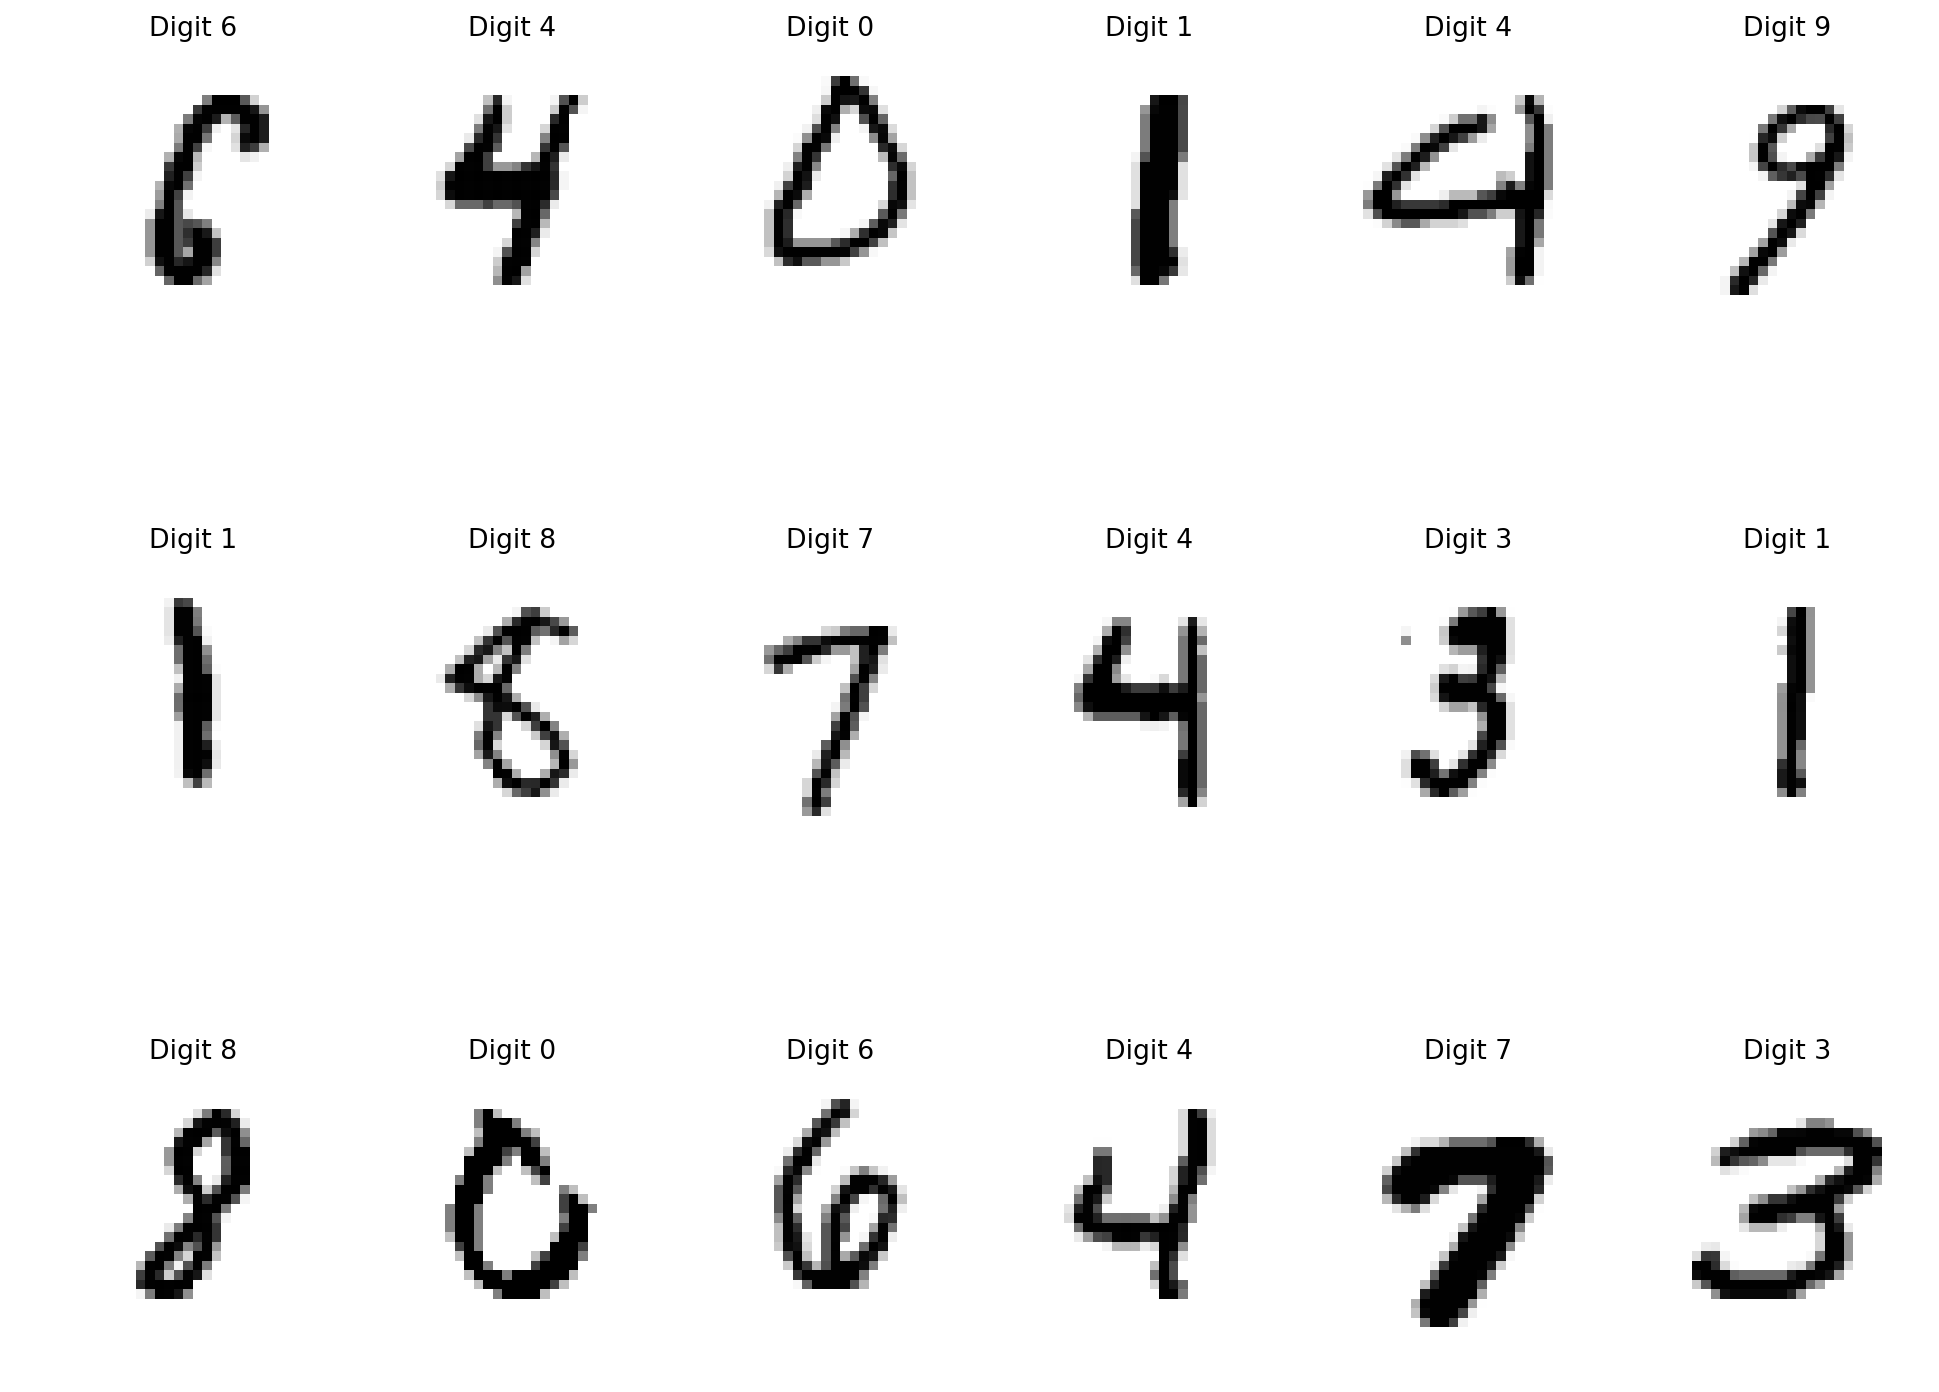

In [63]:
# Show some digits at random
show_random_digits(images, targets, 18)

In [64]:
# Full dataset classification
X_data = images/255.0
Y = targets

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.2, random_state=123)

In [65]:
# Grid Search for best parameters
parameters = {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}
clf_svm = svm.SVC()

start = time()

grid_search = GridSearchCV(estimator=clf_svm, param_grid=parameters, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for 9 candidates"
      " parameter settings." % ((time() - start)))

clf_grid_best = grid_search.best_estimator_
best_score_grid_search = grid_search.best_score_

print ('Best parameters:', best_params_grid_search)
print ('Best score:', best_score_grid_search)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  4.6min finished


GridSearchCV took 283.43 seconds for 9 candidates parameter settings.
Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best score: 0.94375


In [72]:
# Random Search for best parameters
parameters = {'C': range(1, 1000), 'gamma': scipy.stats.expon(scale=.1), 'kernel': ['rbf']}
clf_svm = svm.SVC()


# run randomized search
n_iter_search = 9
random_search = RandomizedSearchCV(clf_svm, param_distributions=parameters,
                                   n_iter=n_iter_search, n_jobs=-1, verbose=2)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))

clf_random_best = random_search.best_estimator_
best_score_random_search = random_search.best_score_

print ('Best parameters:', best_params_random_search)
print ('Best score:', best_score_random_search)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  4.9min finished


RandomizedSearchCV took 312.77 seconds for 9 candidates parameter settings.
Best parameters: {'C': 597, 'gamma': 0.03370050005850599, 'kernel': 'rbf'}
Best score: 0.951


In [73]:
# Prediction
y_pred = clf_random_best.predict(X_test)

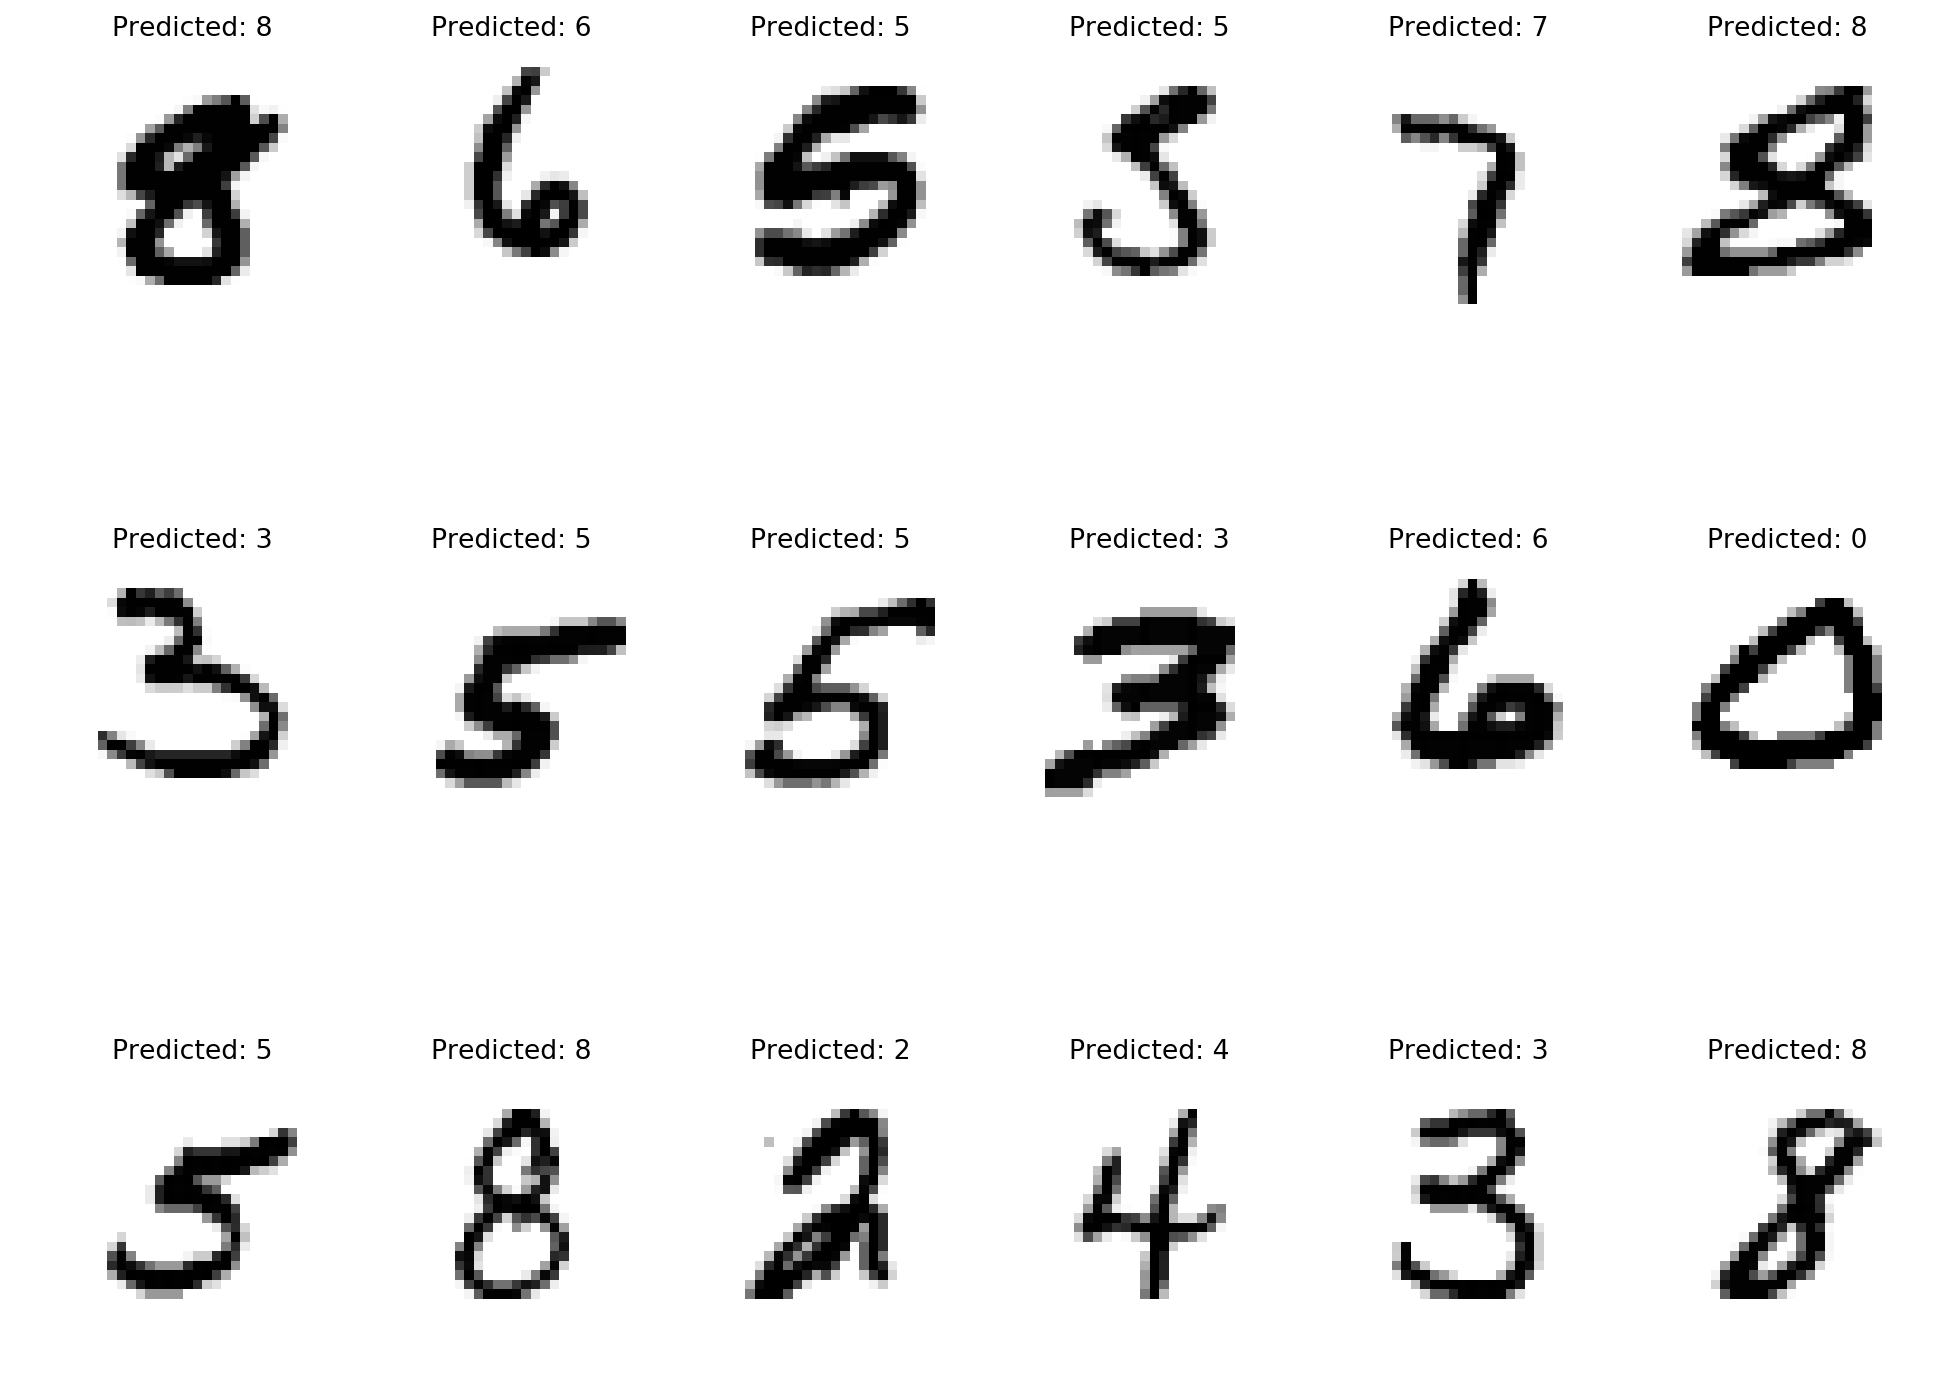

In [74]:
# Some of the predictions
show_random_digits(X_test, y_pred, 18, title_text="Predicted: {}")

Accuracy: 0.956
Classification report for classifier SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

        0.0       0.99      0.97      0.98       109
        1.0       0.97      0.98      0.98       110
        2.0       0.94      0.98      0.96       105
        3.0       0.95      0.95      0.95        84
        4.0       0.93      0.92      0.92       111
        5.0       0.98      0.94      0.96       105
        6.0       0.95      0.99      0.97        94
        7.0       1.00      0.91      0.95        99
        8.0       0.92      0.98      0.95        88
        9.0       0.93      0.94      0.93        95

avg / total       0.96      0.96      0.96      1000


Confusion matrix:
[[106   0   1   0   0   0   1   0   1   0]
 [  0 108   1   0   0  

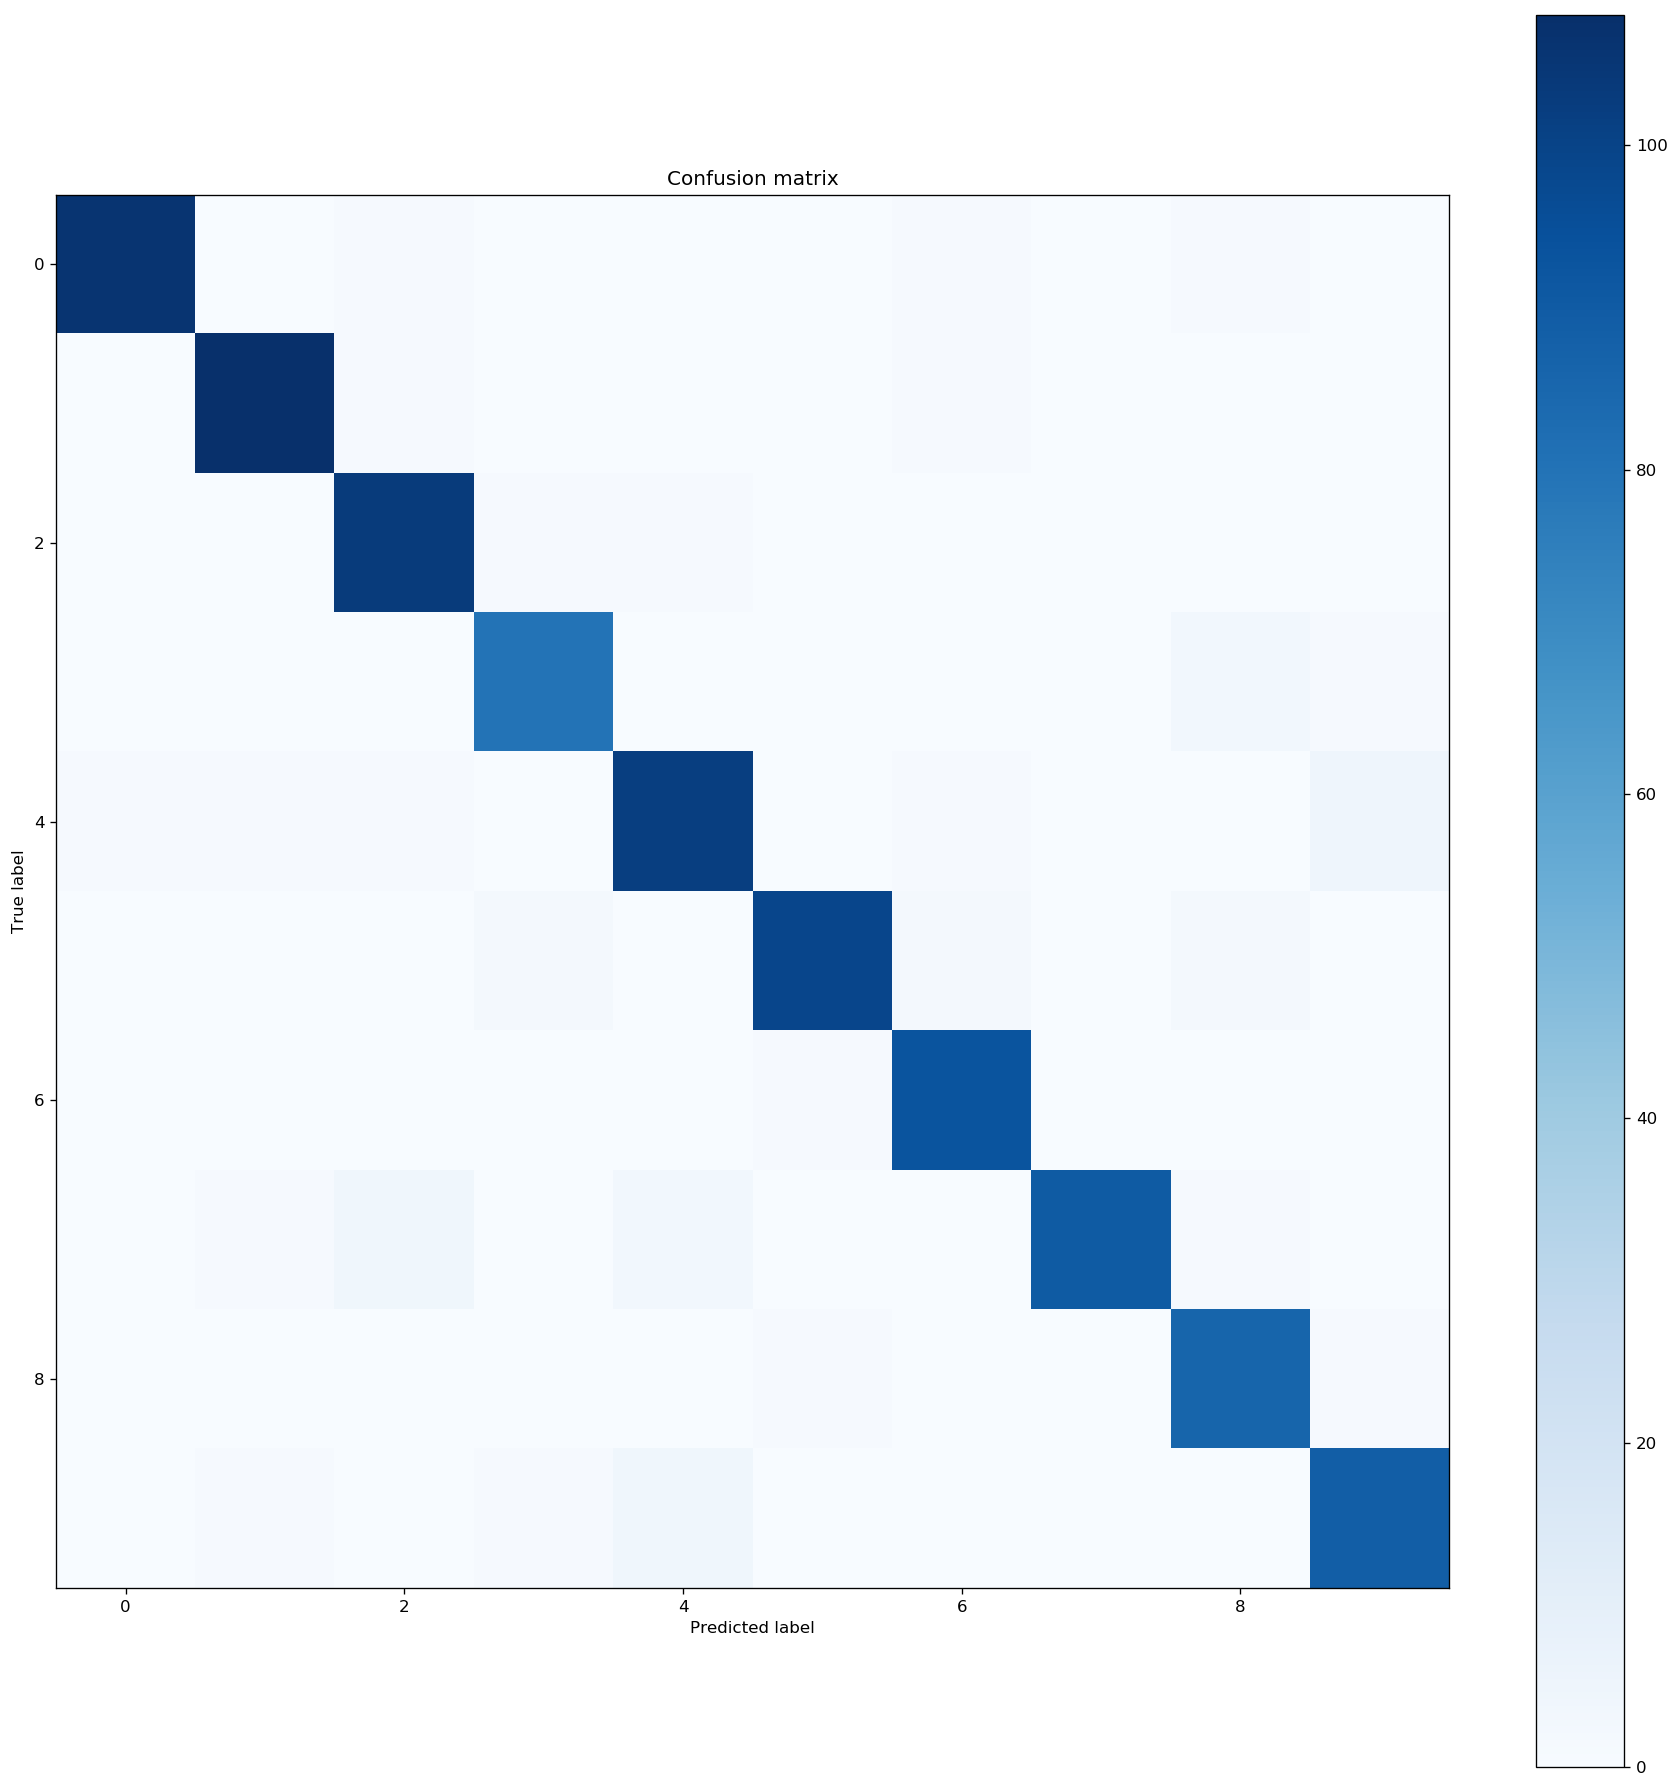

In [75]:
# Results
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

print("Classification report for classifier %s:\n%s\n"
      % (clf_svm_best, metrics.classification_report(y_test, y_pred)))
      
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n%s" % cm)
plot_confusion_matrix(cm)